Problem statement:Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants:

     1.To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

     2.To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.
     3.To know the accuracy of the model, i.e. how well these variables can predict house prices.
     
(Note:use regularization concept to avoid over-fitting)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing


In [2]:
#EDA
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df=df.replace("furnished","c")
df=df.replace("semi-furnished","b")
df=df.replace("unfurnished","a")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,c
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,c
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,b
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,c
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,c


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
Columns=list(df.columns)
Columns

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

In [7]:
# df.price=np.log(df.price)
# sns.histplot(df.price,kde=True)

<Axes: ylabel='price'>

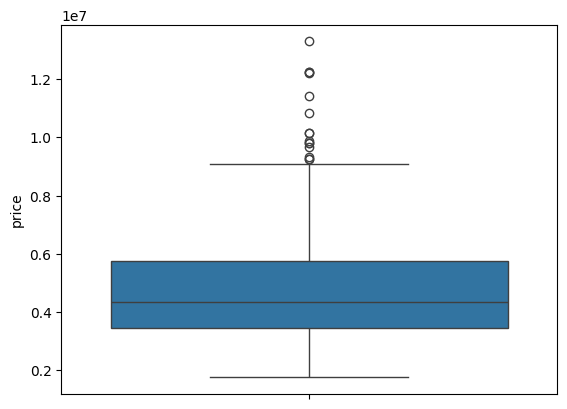

In [8]:
sns.boxplot(df.price)
#observed outliers

<Axes: ylabel='price'>

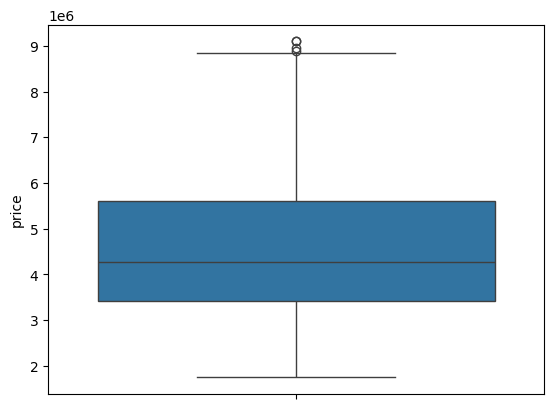

In [9]:
from scipy import stats
Q1=np.percentile(df.price,25)
Q3=np.percentile(df.price,75)
IQR = stats.iqr(df.price)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
df=df[(df.price<up_lim) & (df.price>low_lim)]
sns.boxplot(df.price)

In [10]:
#checking for labelling
label_encoder=preprocessing.LabelEncoder()
def label_enc(C,df1):
   for i in C:
    if(df[i].dtype=="object"):
            df[i]=label_encoder.fit_transform(df[i]) 
            print(df[i].unique())

In [11]:
label_enc(Columns,df)
df.head()

[1 0]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[1 0 2]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,2
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,2
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1


In [12]:
# sns.pairplot(df)

# Define your independent variables (X) and dependent variable (y)

In [13]:
y=df.price
X=df.drop(columns=['price'])

In [14]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,1,0,1,0,0,2,0,1
16,6600,4,2,2,1,1,1,0,1,1,1,0
17,8500,3,2,4,1,0,0,0,1,2,0,2
18,4600,3,2,2,1,1,0,0,1,2,0,2
19,6420,3,2,2,1,0,0,0,1,1,1,1


In [15]:
np.corrcoef(y,X["area"])[0][1]

0.5098559538900829

In [16]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,6000,4,1,2,1,0,1,0,0,2,0,1
16,6600,4,2,2,1,1,1,0,1,1,1,0
17,8500,3,2,4,1,0,0,0,1,2,0,2
18,4600,3,2,2,1,1,0,0,1,2,0,2
19,6420,3,2,2,1,0,0,0,1,1,1,1


In [17]:
# Columns=list(X.columns)
# print(Columns)
# list1=[]
# for i in Columns:
#     cor=np.corrcoef(y,X[i])[0][1]
#     print(cor)
#     if(cor>0.3):
#         list1.append(i)
# print(list1)  
# X1=pd.DataFrame()
# for i in list1:
#     X1[i]=X[i]    
# X1.head()

In [18]:
# Add a constant to X for statsmodels OLS
X=sm.add_constant(X)

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
# Fit the OLS model
# model = LinearRegression()
# model=model.fit(X_train,y_train)
model=sm.OLS(y_train,X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     68.46
Date:                Sun, 15 Dec 2024   Prob (F-statistic):           4.25e-90
Time:                        10:27:31   Log-Likelihood:                -6427.6
No. Observations:                 424   AIC:                         1.288e+04
Df Residuals:                     411   BIC:                         1.293e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              2.24e+05   2.35e+05      0.952      0.342   -2.38e+05    6.86e+05
area               202.0609     24.952      8.098      0.000     153.012     251.110
bedrooms          9.876e+04   7.33e+04      1.347      0.179   -4.54e+04    2.43e+05
bathrooms         7.236e+05    1.1e+05      6.558      0.000    5.07e+05     9.4e+05
stories           4.732e+05   6.36e+04      7.444      0.000    3.48e+05    5.98e+05
mainroad          4.535e+05    1.4e+05      3.245      0.001    1.79e+05    7.28e+05
guestroom         2.934e+05    1.3e+05      2.262      0.024    3.85e+04    5.48e+05
basement          4.098e+05    1.1e+05      3.725      0.000    1.94e+05    6.26e+05
hotwaterheating   7.246e+05   2.19e+05      3.302      0.001    2.93e+05    1.16e+06
airconditioning   7.972e+05   1.08e+05      7.374      0.000    5.85e+05    1.01e+06
parking           2.556e+05   5.98e+04      4.273      0.000    1.38e+05    3.73e+05
prefarea          4.553e+05   1.18e+05      3.867      0.000    2.24e+05    6.87e+05
furnishingstatus  1.896e+05    6.3e+04      3.008      0.003    6.57e+04    3.13e+05
==============================================================================
Omnibus:                       28.252   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.774
Skew:                           0.466   Prob(JB):                     1.89e-10
Kurtosis:                       4.290   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# lr=model
# print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
# print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

In [38]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.01).fit(X_train, y_train)
print(f"Elastic Net-Training set score: {elastic_net.score(X_train, y_train):.2f}")
print(f"Elastic Net-Test set score: {elastic_net.score(X_test, y_test):.2f}")

Elastic Net-Training set score: 0.67
Elastic Net-Test set score: 0.64


In [22]:
# Predict on the test set
y_pred=model.predict(X_test)

In [23]:
# Calculate residuals
residuals=y_test-y_pred

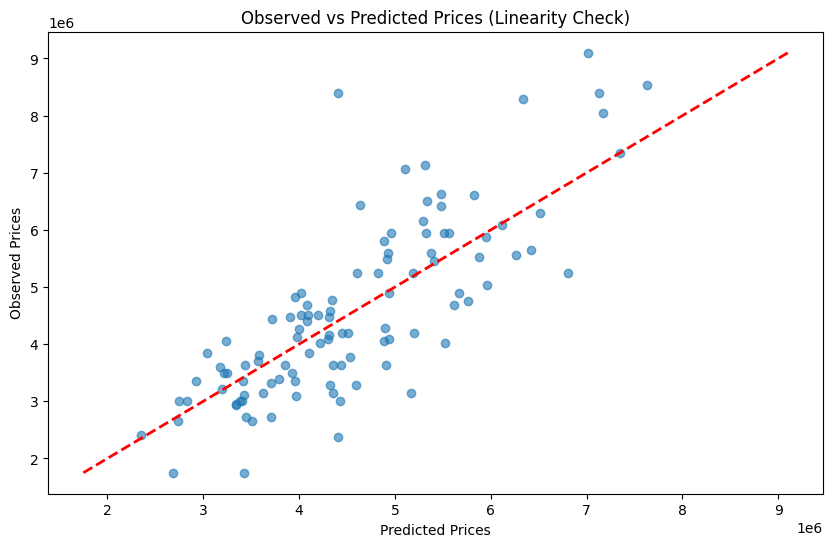

In [24]:
# Assumption 1: Linearity - Check with a scatter plot of observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Observed Prices')
plt.title('Observed vs Predicted Prices (Linearity Check)')
plt.show()

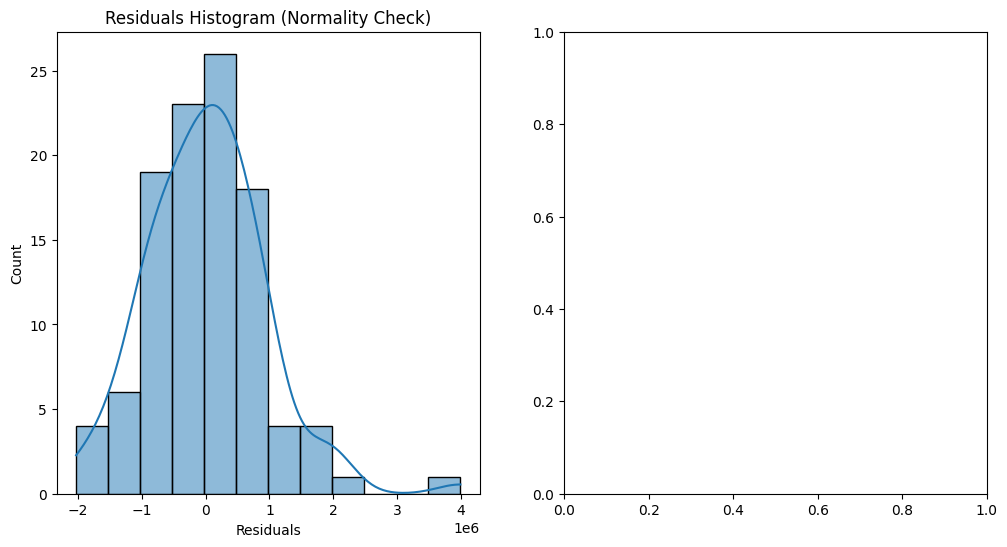

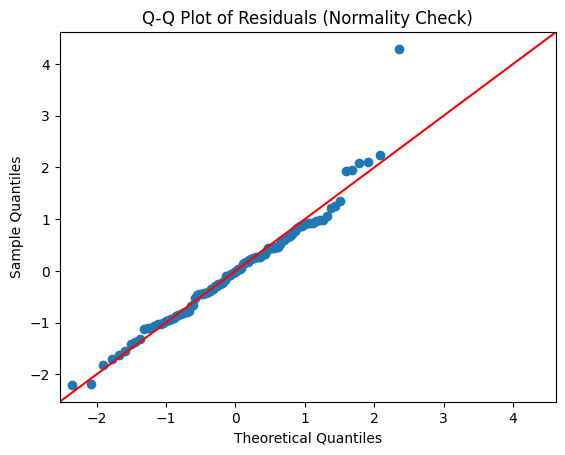

In [25]:
# Assumption 2: Normality of Errors - Check with histogram and Q-Q plot of residuals
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Histogram (Normality Check)')

# Q-Q plot
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Normality Check)')
plt.show()

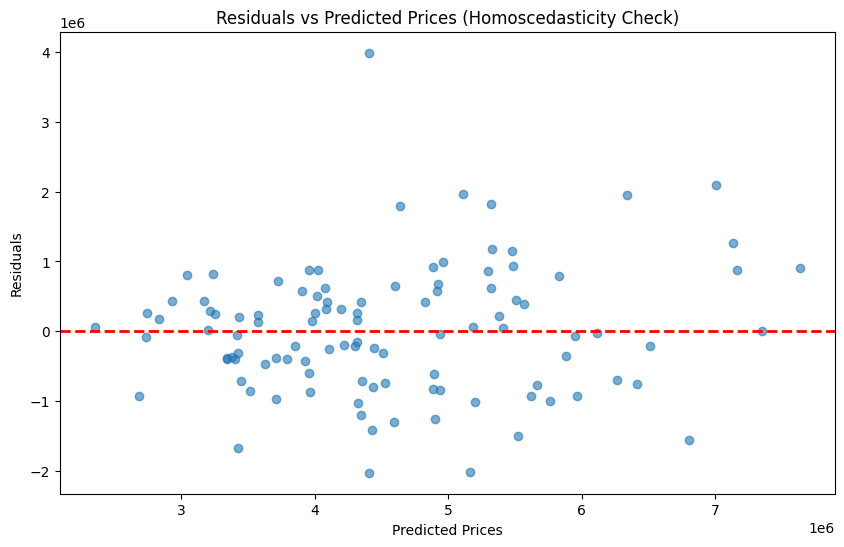

In [26]:
# Assumption 3: Homoscedasticity - Check with a scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices (Homoscedasticity Check)')
plt.show()

In [27]:
# Assumption 4: No Multicollinearity - Check Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("Variance Inflation Factors (VIF):")
print(vif_data)

Variance Inflation Factors (VIF):
             feature        VIF
0              const  26.421939
1               area   1.340378
2           bedrooms   1.391030
3          bathrooms   1.281502
4            stories   1.515057
5           mainroad   1.210149
6          guestroom   1.229462
7           basement   1.312991
8    hotwaterheating   1.033485
9    airconditioning   1.196587
10           parking   1.183683
11          prefarea   1.141920
12  furnishingstatus   1.109886


In [28]:
# Assumption 5: No Autocorrelation - Check using Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

# Durbin-Watson statistic interpretation
if dw_stat < 1.5:
    print("Potential positive autocorrelation.")
elif dw_stat > 2.5:
    print("Potential negative autocorrelation.")
else:
    print("No significant autocorrelation.")

Durbin-Watson statistic: 2.0926965281343506
No significant autocorrelation.


In [39]:
model.rsquared_adj

0.6567972028406759

In [40]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                  Adj. R-squared:         0.657     
Dependent Variable:      price                AIC:                    12881.1943
Date:                    2024-12-15 10:34     BIC:                    12933.8408
No. Observations:        424                  Log-Likelihood:         -6427.6   
Df Model:                12                   F-statistic:            68.46     
Df Residuals:            411                  Prob (F-statistic):     4.25e-90  
R-squared:               0.667                Scale:                  8.8789e+11
--------------------------------------------------------------------------------
                    Coef.      Std.Err.    t    P>|t|     [0.025       0.975]   
--------------------------------------------------------------------------------
const            223955.9901 235223.0272 0.9521 0.3416 -238434.3060  686346.2862
area                202.0609     24.9519 8.0980 0.0000     153.0117     251.1100
bedrooms          98763.6898  73316.3410 1.3471 0.1787  -45358.1039  242885.4835
bathrooms        723570.7161 110337.1974 6.5578 0.0000  506675.0746  940466.3576
stories          473184.1370  63568.2805 7.4437 0.0000  348224.6193  598143.6548
mainroad         453452.4888 139726.5126 3.2453 0.0013  178784.7223  728120.2553
guestroom        293383.2666 129687.0714 2.2622 0.0242   38450.5584  548315.9749
basement         409758.3050 110004.0971 3.7249 0.0002  193517.4564  625999.1537
hotwaterheating  724621.7641 219436.9425 3.3022 0.0010  293263.0062 1155980.5219
airconditioning  797184.5504 108107.8280 7.3740 0.0000  584671.2978 1009697.8030
parking          255587.1352  59817.2860 4.2728 0.0000  138001.1449  373173.1254
prefarea         455290.8476 117722.7024 3.8675 0.0001  223877.1298  686704.5654
furnishingstatus 189592.0347  63022.6476 3.0083 0.0028   65705.0962  313478.9731
--------------------------------------------------------------------------------
Omnibus:                   28.252            Durbin-Watson:               1.807 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            44.774
Skew:                      0.466             Prob(JB):                    0.000 
Kurtosis:                  4.290             Condition No.:               30146 
================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
[2] The condition number is large, 3.01e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""